In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

/Users/hannahleblanc/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
df_products = pd.read_csv('data/processed_prod_data.csv')
df_products[['url_path','product_id']] = df_products['url_path'].str.split("-P",expand=True)

/var/folders/3_/49qq58ns2r11fnng7d9pbd0w0000gn/T/ipykernel_10117/404212568.py:1: DtypeWarning: Columns (15,16,17,18,19,20,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_products = pd.read_csv('data/processed_prod_data.csv')


to-do

- what exactly is a single product in the dataset


- dist of ratings

- dist of product reviews 
- dist of loves 
- dist of product_names per brand_name
- dist of amount, by measurement
- boxplot of amount, by measurement and swatch group size 
- count of swatch group sizes


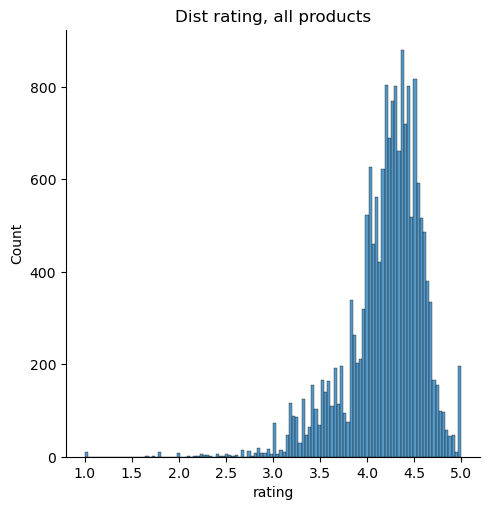

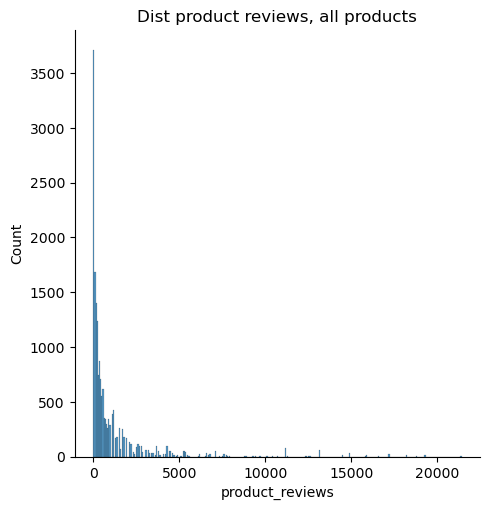

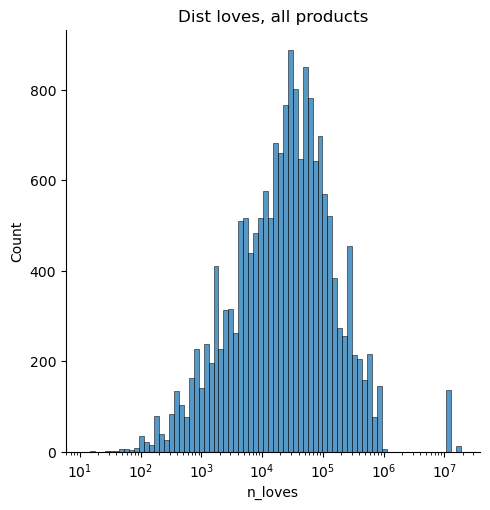

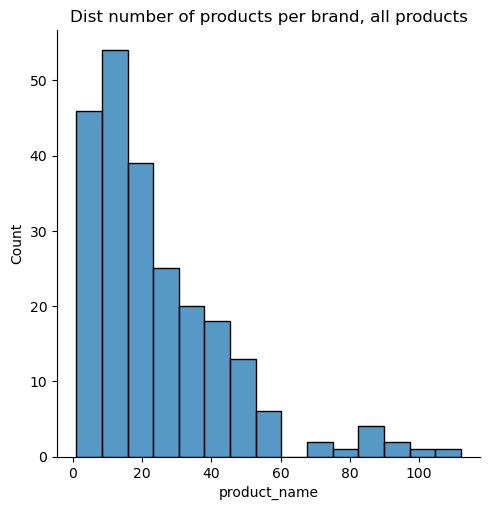

brand_name  product_name
184  sephora collection           112
122           kérastase            98
24    bumble and bumble            94
133       mac cosmetics            91
210            tom ford            89

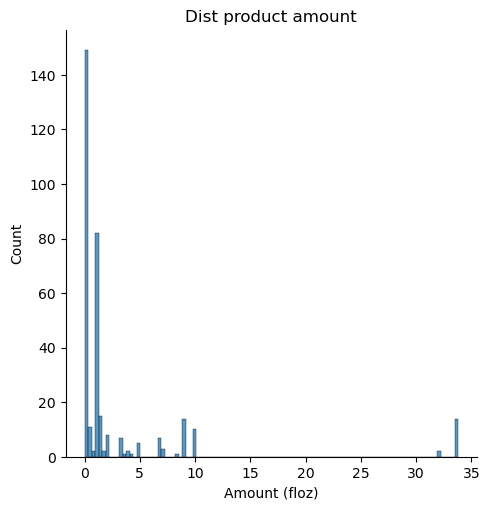

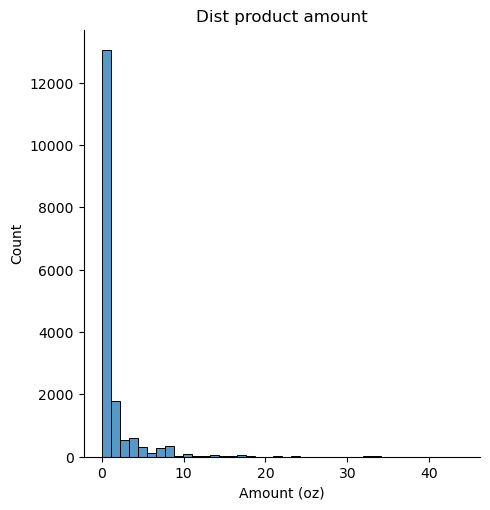

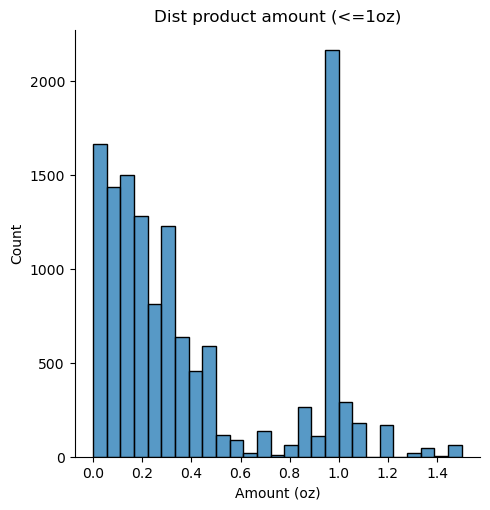

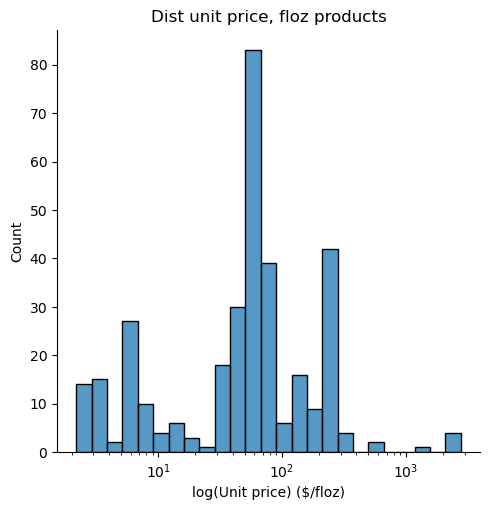

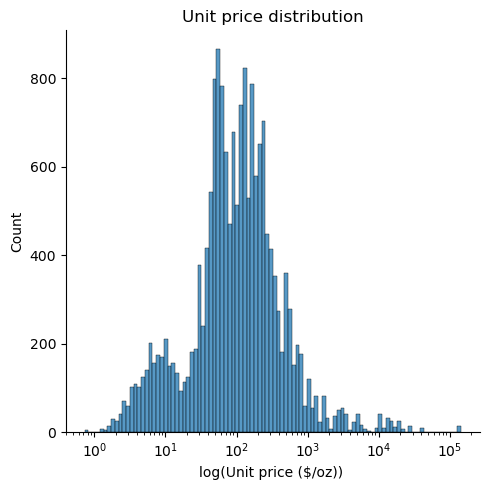

In [27]:

sns.displot(data=df_products, x="rating")
plt.title('Dist rating, all products')
plt.show()

sns.displot(data=df_products, x="product_reviews")#, log_scale=True)
plt.title('Dist product reviews, all products')
plt.show()

sns.displot(data=df_products, x="n_loves", log_scale=True)
plt.title('Dist loves, all products')
plt.show()

prods_per_brand = df_products.groupby('brand_name', as_index=False)['product_name'].nunique()
sns.displot(data=prods_per_brand, x="product_name")
plt.title('Dist number of products per brand, all products')
plt.show()
display(prods_per_brand.sort_values(by='product_name', ascending=False).head())

sns.displot(data=df_products[df_products['unit_a']=='floz'], x="amount_a")
plt.title('Dist product amount')
plt.xlabel('Amount (floz)')
plt.show()

sns.displot(data=df_products[df_products['unit_a']=='oz'], x="amount_a", bins=40)
plt.title('Dist product amount')
plt.xlabel('Amount (oz)')
plt.show()

sns.displot(data=df_products[(df_products['unit_a']=='oz') & (df_products['amount_a']<=1.5)], x="amount_a")
plt.title('Dist product amount (<=1oz)')
plt.xlabel('Amount (oz)')
plt.show()

sns.displot(data=df_products[df_products['unit_a']=='floz'], x="unit_price",log_scale=True)
plt.title('Dist unit price, floz products')
plt.xlabel('log(Unit price) ($/floz)')
plt.show()

sns.displot(data=df_products, x="unit_price", log_scale=True)
plt.title('Unit price distribution')
plt.xlabel('log(Unit price ($/oz)) ')
plt.tight_layout()
plt.show()

In [32]:
df_products.sort_values(by='unit_price', ascending=True).head()

internal_product_id                                                url                                  product_name                  brand_name                                            options  rating  product_reviews                                        ingredients  n_loves                                         categories   swatch_group              size              name  price      sku out_of_stock limited_edition new_product few_left   sale refill    lvl_0_cat              lvl_1_cat                 lvl_2_cat                                           url_path  url_sku                                         url_params product_multiplier multiplier  amount_a unit_a  amount_b unit_b misc_info swatch_details  unit_price product_id
14795                 6506  https://www.sephora.com/ca/en/product/fantasiz...       fantasize lifting & lengthening mascara  one/size by patrick starrr  [{'swatch_group': 'Standard size', 'size': Non...  4.2731            443.0  -Castor Seed Oil: Known to nourish and visibly...  13500.0                       ['Makeup', 'Eye', 'Mascara']      mini size  26 oz 6 ml black               NaN   19.0  2589620        False           False       False    False  False  False       Makeup                    Eye                   Mascara  /ca/en/product/fantasize-lifting-lengthening-m...  2589612  {'skuId': ['2589612'], 'icid2': ['products gri...                NaN        NaN     26.00     oz       6.0     ml     black      mini size    0.730769     500481
14769                 6498  https://www.sephora.com/ca/en/product/mini-fan...  mini fantasize lifting & lengthening mascara  one/size by patrick starrr  [{'swatch_group': 'Mini size', 'size': None, '...  4.0705            312.0  -Castor Seed Oil: Known to nourish and visibly...   9600.0                       ['Makeup', 'Eye', 'Mascara']      mini size  26 oz 6 ml black               NaN   19.0  2589620        False           False       False    False  False  False       Makeup                    Eye                   Mascara  /ca/en/product/mini-fantasize-lifting-lengthen...  2589620  {'skuId': ['2589620'], 'icid2': ['products gri...                NaN        NaN     26.00     oz       6.0     ml     black      mini size    0.730769     500501
12126                 5458  https://www.sephora.com/ca/en/product/strength...             strengthening shampoo with biotin          sephora collection  [{'swatch_group': 'Standard size', 'size': Non...  2.6250             24.0  -Synthetic-Origin Biotin: Improves hair qualit...   3300.0       ['Hair', 'Shampoo & Conditioner', 'Shampoo']  standard size   10.14 oz 300 ml               NaN    8.0  2558609        False           False       False    False   True  False         Hair  Shampoo & Conditioner                   Shampoo   /ca/en/product/strengthening-shampoo-with-biotin  2558609  {'skuId': ['2558609'], 'icid2': ['products gri...                NaN        NaN     10.14     oz     300.0     ml       NaN  standard size    0.788955     500905
12112                 5446  https://www.sephora.com/ca/en/product/strength...         strengthening conditioner with biotin          sephora collection  [{'swatch_group': 'Standard size', 'size': Non...  3.7857             14.0  -Three Oils from Natural Origin: Derived from ...   2900.0   ['Hair', 'Shampoo & Conditioner', 'Conditioner']  standard size   10.14 oz 300 ml               NaN    8.0  2558617        False           False       False    False   True  False         Hair  Shampoo & Conditioner               Conditioner  /ca/en/product/strengthening-conditioner-with-...  2558617  {'skuId': ['2558617'], 'icid2': ['products gri...                NaN        NaN     10.14     oz     300.0     ml       NaN  standard size    0.788955     500847
12647                 5584  https://www.sephora.com/ca/en/product/sephora-...                      moisturizing body lotion          sephora collection  [{'swatch_group': 'Standard size', 'size': 'Si...  3.7009            107.0  Aqu

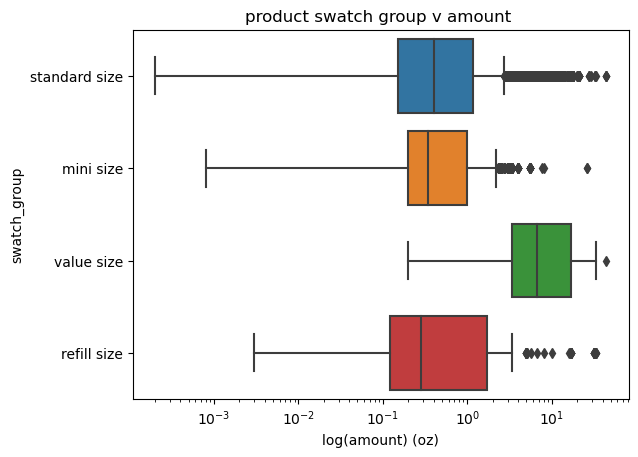

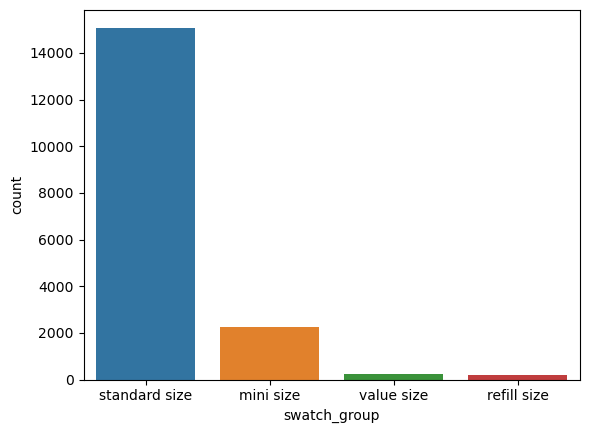

In [5]:


sns.boxplot(data=df_products[(df_products['unit_a']=='oz')], x="amount_a", y="swatch_group")
plt.xscale('log')
plt.xlabel('log(amount) (oz)' )
plt.title('product swatch group v amount ')
plt.show()


sns.countplot(x=df_products["swatch_group"])
plt.show()


In [6]:
df_products.groupby(['unit_a','unit_b'])['internal_product_id'].count().head(100)

unit_a  unit_b
floz    g             1
        ml          335
oz      g          6073
        ml        11368
Name: internal_product_id, dtype: int64

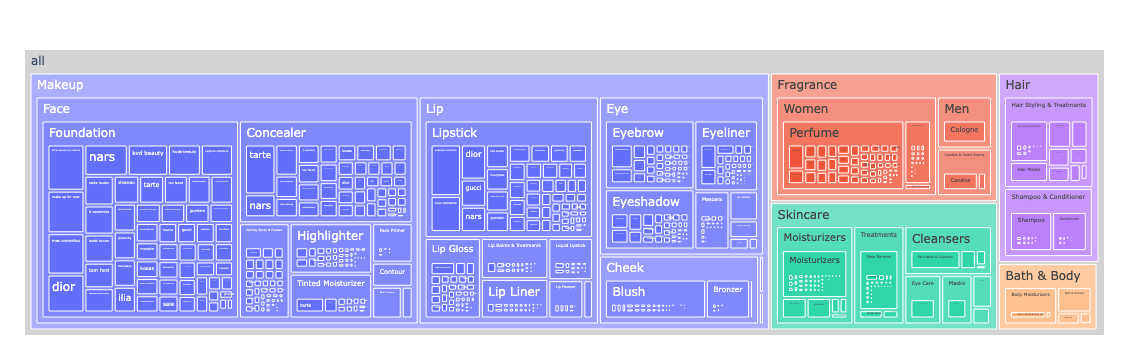

In [7]:

df_products_tree = df_products.groupby(['lvl_0_cat', 'lvl_1_cat', 'lvl_2_cat','brand_name'], as_index=False)['internal_product_id'].count()
fig = px.treemap(df_products_tree, path=[px.Constant("all"), 'lvl_0_cat', 'lvl_1_cat', 'lvl_2_cat','brand_name'], values='internal_product_id')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

# what is a single product ?

[brand_name, product_name, swatch_group, size, price]
 - if price is used and only some options are on sale, this would create duplicates
 - if price is left out of group-by, what is the best way to aggregate? max?
 
 - aggregated values like rating, product_reviews, n_loves should be same for all options of product?


https://www.sephora.com/ca/en/product/P434104?skuId=2407302

as each swatch group is clicked, sku in url changes
- a single product can have multiple skus depending on colour
- a single product can have multiple skus depending on size 


### Comparing standard with mini sizes

In [8]:
df = df_products.groupby(['product_id','product_name', 'brand_name', 'swatch_group','amount_a'], as_index=False).agg({
    'price':'max',
    'internal_product_id':'nunique',
    'rating':'max',
    'product_reviews':'max',
    'n_loves':'max',
    'lvl_0_cat':'first',
    'lvl_1_cat':'first',
    'lvl_2_cat':'first',
    'sku':'unique',
    'amount_b':'first',
    'unit_b':'first'
})

df['unit_price'] = df['price']/df['amount_a']

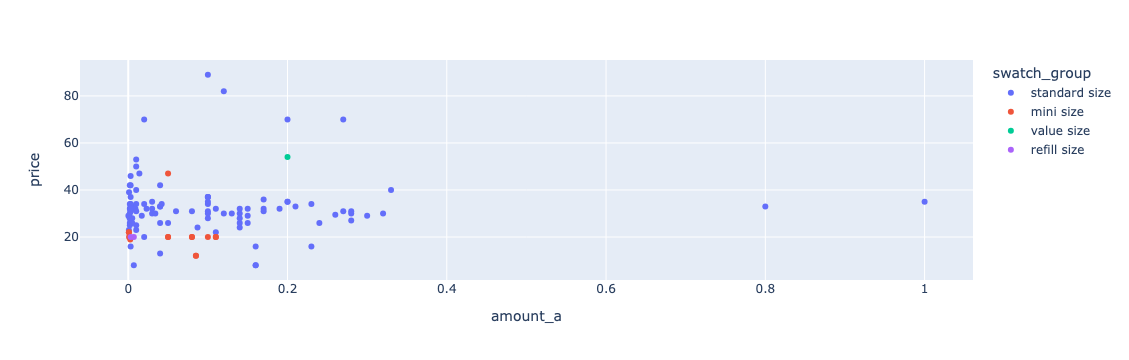

In [9]:
df.head(5)
# https://www.sephora.com/ca/en/product/guerlain-abeille-royale-youth-watery-anti-aging-oil-P474953?skuId=2492858&icid2=products%20grid:p474953:product
# https://www.sephora.com/ca/en/product/highlighter-P404798?skuId=2074532&icid2=products%20grid:p404798:product
# examples of diff product sizes with same name

fig = px.scatter(df[df['lvl_2_cat']=='Eyebrow'], x="amount_a", y="price", color="swatch_group", hover_data=['brand_name', 'product_name'])
fig.show()



In [10]:
eligible_products = df[df['swatch_group'].isin(['standard size','mini size'])].groupby(['product_id'], as_index=False)['swatch_group'].count()
df = df.sort_values(by='amount_a',ascending=True)

eligible_products = df[df['swatch_group'].isin(['standard size','mini size'])].groupby(['product_id'], as_index=False)['swatch_group'].count()
eligible_products = eligible_products[eligible_products['swatch_group']==2]['product_id'].values
target_comp_df = df[(df['product_id'].isin(eligible_products)) & (df['swatch_group'].isin(['standard size','mini size']))]
target_comp_df['full_product'] = target_comp_df['brand_name']+' '+ target_comp_df['product_name']

/var/folders/3_/49qq58ns2r11fnng7d9pbd0w0000gn/T/ipykernel_10117/1508495019.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Swatch group comparisons

In [11]:
# target_comp_df = target_comp_df[target_comp_df['brand_name']=='milk makeup']
target_comp_df = target_comp_df[target_comp_df.groupby(['brand_name','product_name'])['swatch_group'].transform(lambda x : x.nunique()>1)]


target_comp_df = target_comp_df.pivot(index=['brand_name','product_name'], columns='swatch_group', values='unit_price')
target_comp_df = target_comp_df.reset_index()
target_comp_df['size_diff'] = target_comp_df['standard size'] - target_comp_df['mini size']

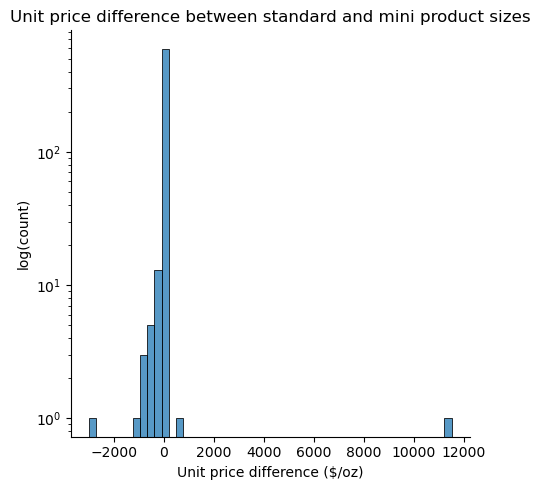

In [24]:
# .hist(bins=50)
# plt.yscale('log')
# plt.grid()

sns.displot(data=target_comp_df, x="size_diff", bins=50)
plt.title('')
plt.yscale('log')
plt.ylabel('log(count)')
plt.title('Unit price difference between standard and mini product sizes')
plt.xlabel('Unit price difference ($/oz)')
plt.tight_layout()
plt.show()

In [34]:
target_comp_df.sort_values(by='size_diff',ascending=True).head(10)

swatch_group         brand_name                                       product_name     mini size  standard size    size_diff
24            benefit cosmetics  precisely, my brow pencil waterproof eyebrow d...  20000.000000   17000.000000 -3000.000000
269                  kvd beauty      tattoo liner vegan waterproof liquid eyeliner   2785.714286    1710.526316 -1075.187970
261                kilian paris                     black phantom - "memento mori"   1180.000000     210.000000  -970.000000
263                kilian paris                  straight to heaven, white cristal   1180.000000     210.000000  -970.000000
26            benefit cosmetics            roller liner waterproof liquid eyeliner   1900.000000    1000.000000  -900.000000
331            make up for ever           hd skin undetectable longwear foundation    725.000000      57.425743  -667.574257
207                   hourglass                 ambient® lighting finishing powder    734.693878     197.142857  -537.551020
208                   hourglass                    ambient® strobe lighting powder    900.000000     362.500000  -537.500000
206                   hourglass                  ambient lighting blush collection    900.000000     386.666667  -513.333333
445            pat mcgrath labs                              mattetrance™ lipstick    785.714286     364.285714  -421.428571

In [39]:
target_comp_df.sort_values(['size_diff', 'mini size'], ascending=[True, False]).head(20)


swatch_group         brand_name                                       product_name     mini size  standard size    size_diff
24            benefit cosmetics  precisely, my brow pencil waterproof eyebrow d...  20000.000000   17000.000000 -3000.000000
269                  kvd beauty      tattoo liner vegan waterproof liquid eyeliner   2785.714286    1710.526316 -1075.187970
261                kilian paris                     black phantom - "memento mori"   1180.000000     210.000000  -970.000000
263                kilian paris                  straight to heaven, white cristal   1180.000000     210.000000  -970.000000
26            benefit cosmetics            roller liner waterproof liquid eyeliner   1900.000000    1000.000000  -900.000000
331            make up for ever           hd skin undetectable longwear foundation    725.000000      57.425743  -667.574257
207                   hourglass                 ambient® lighting finishing powder    734.693878     197.142857  -537.551020
208                   hourglass                    ambient® strobe lighting powder    900.000000     362.500000  -537.500000
206                   hourglass                  ambient lighting blush collection    900.000000     386.666667  -513.333333
445            pat mcgrath labs                              mattetrance™ lipstick    785.714286     364.285714  -421.428571
546                       tarte                              shape tape™ glow wand    545.454545     195.000000  -350.454545
215                   hourglass                         vanish™ airbrush concealer    575.000000     230.000000  -345.000000
178                freck beauty                         freck the original freckle    644.444444     336.363636  -308.080808
15                 bareminerals              mineral veil talc free setting powder    342.857143     140.000000  -202.857143
338            make up for ever             ultra hd microfinishing pressed powder    428.571429     233.333333  -195.238095
387                        nars                           radiant creamy concealer    380.000000     190.909091  -189.090909
508                    smashbox  smashbox x becca shimmering skin perfector™ pr...    375.000000     208.333333  -166.666667
23            benefit cosmetics                                      hoola bronzer    300.000000     167.857143  -132.142857
66            charlotte tilbury            airbrush flawless finish setting powder    336.363636     214.285714  -122.077922
266                       kosas  revealer super creamy + brightening concealer ...    316.666667     200.000000  -116.666667

In [76]:
# target_comp_df = target_comp_df[['''product_name','mini size','standard size']]
# display(target_comp_df.head())

In [77]:
target_comp_df = target_comp_df.set_index(['brand_name','product_name']).stack('swatch_group').reset_index().rename(columns={0:'unit_price'})

In [78]:
target_comp_df

brand_name                                       product_name   swatch_group  unit_price
0              54 thrones  african beauty butter- intensive dry skin trea...      mini size   15.000000
1              54 thrones  african beauty butter- intensive dry skin trea...  standard size   17.647059
2              54 thrones  african beauty butter- intensive dry skin trea...      size_diff    2.647059
3            adwoa beauty               baomint™ deep conditioning treatment      mini size    5.454545
4            adwoa beauty               baomint™ deep conditioning treatment  standard size    3.187500
...                   ...                                                ...            ...         ...
1852  youth to the people  superberry hydrate + glow dream night mask wit...  standard size   34.000000
1853  youth to the people  superberry hydrate + glow dream night mask wit...      size_diff  -14.000000
1854  youth to the people          superfood antioxidant refillable cleanser      mini size    9.500000
1855  youth to the people          superfood antioxidant refillable cleanser  standard size    6.125000
1856  youth to the people          superfood antioxidant refillable cleanser      size_diff   -3.375000

[1857 rows x 4 columns]

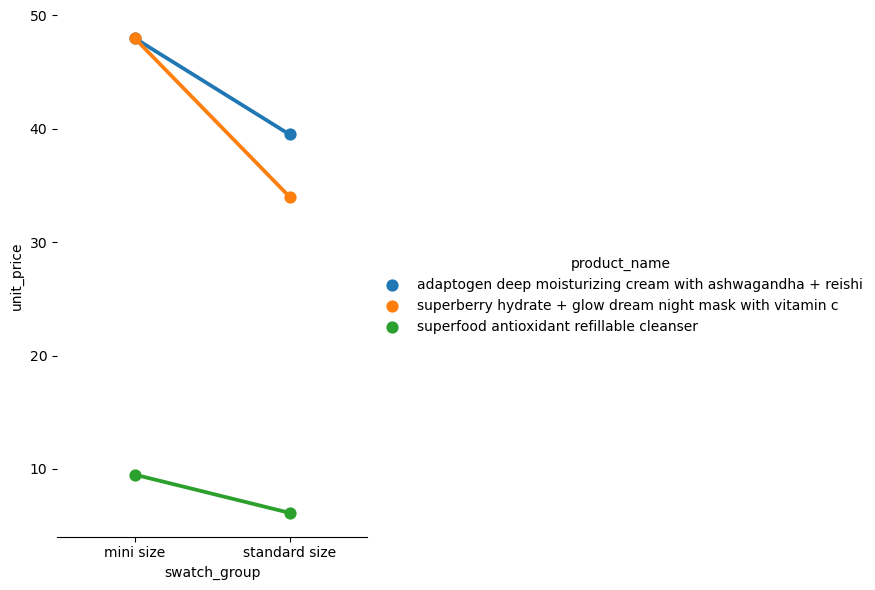

In [82]:
filtered_df = target_comp_df[(target_comp_df['swatch_group']!='size_diff') & (target_comp_df['brand_name']=='youth to the people')]
# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(
    data=filtered_df, x="swatch_group", y="unit_price", hue="product_name",
    capsize=.2, #palette="YlGnBu_d",
    kind="point", height=6, aspect=.75,
)
g.despine(left=True)

In [65]:
# in bare minerals - mini size == standard

In [66]:
issue_brands = ['Tom Ford', 'tarte', 'Moroccanoil', 'Dior', 'Anastasia Beverly Hills']
prods = ['clinique']
# url = 'https://www.sephora.com/ca/en/product/charlotte-tilbury-airbrush-flawless-setting-spray-P461147?skuId=2368439&icid2=products%20grid:p461147:product'

# url = 'https://www.sephora.com/ca/en/product/ambient-lighting-blush-collection-P384963?skuId=1581321&icid2=products%20grid:p384963:product'
# lots of options all same size
# url = "https://www.sephora.com/ca/en/product/saie-glowy-super-skin-lightweight-hydrobounce-serum-foundation-P504907?icid2=new_ca_skugrid_ufe:p504907:product"
# ran into issue getting product name
# url = "https://www.sephora.com/ca/en/product/book-personal-travel-spray-P501954?icid2=homepage_productlist_brandnewadditions_ca_rwd_092022"
# value set works
# url = 'https://www.sephora.com/ca/en/product/laneige-midnight-to-morning-hydration-set-P504208?skuId=2639557&icid2=products%20grid:p504208:product'
# hair brush with no ingredients
# url = 'https://www.sephora.com/ca/en/product/sephora-collection-scalp-massager-P472069?skuId=2414555&icid2=products%20grid:p472069:product'
# new prod
# url = 'https://www.sephora.com/ca/en/product/gxve-by-gwen-stefani-check-my-glow-platinum-glow-highlighter-P505655?icid2=new_ca_skugrid_ufe:p505655:product'
# sale prod
# url = 'https://www.sephora.com/ca/en/product/green-microalgae-retinol-regenerating-serum-P506077?skuId=2672301&icid2=products%20grid:p506077:product'
# no reviews yet or ratings

# broken page https://www.sephora.com/ca/en/product/beautyblender-bronze-besties-P505630?skuId=2662559&icid2=products


with open(data_dir+'brand_data.json') as file:
    brand_data = json.loads(file.read())

NameError: name 'data_dir' is not defined

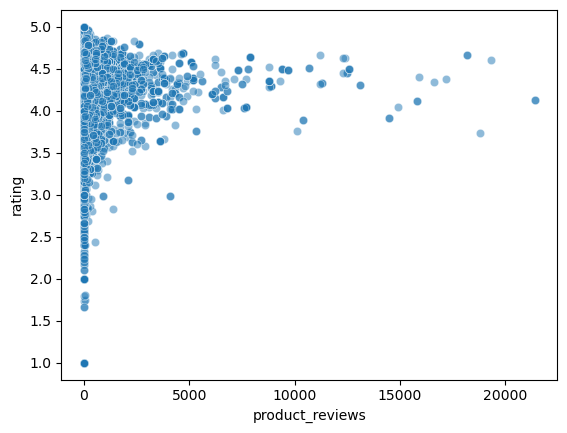

internal_product_id                                                url                        product_name         brand_name                                            options  rating  product_reviews                                        ingredients  n_loves                                         categories   swatch_group              size               name  price      sku out_of_stock limited_edition new_product few_left   sale refill lvl_0_cat                  lvl_1_cat    lvl_2_cat                                           url_path  url_sku                                         url_params product_multiplier multiplier  amount_a unit_a  amount_b unit_b misc_info swatch_details  unit_price product_id
353                   144  https://www.sephora.com/ca/en/product/a-tint-o...                brownish hair powder  bumble and bumble  [{'swatch_group': 'Standard size', 'size': Non...  3.1164            507.0  Dimethyl Ether, Alcohol Denat., Propylene Glyc...   8500.0  ['Hair', 'Hair Styling & Treatments', 'Dry Sha...  standard size     4.4 oz 130 ml                NaN   50.0  1270388        False           False       False    False  False  False      Hair  Hair Styling & Treatments  Dry Shampoo         /ca/en/product/a-tint-of-brown-hair-powder  1270388  {'skuId': ['1270388'], 'icid2': ['products gri...                NaN        NaN     4.400     oz    130.00     ml       NaN  standard size   11.363636     280526
1805                 1215  https://www.sephora.com/ca/en/product/morphe-m...  make it big brush-tip liquid liner             morphe  [{'swatch_group': 'Standard size', 'size': 'Si...  2.9583             24.0  Water (Aqua, Eau), Acrylates Copolymer, Black ...   1300.0                      ['Makeup', 'Eye', 'Eyeliner']  standard size  0.019 oz 0.55 ml  color: bold black   16.0  2524718        False           False       False    False  False  False    Makeup                        Eye     Eyeliner  /ca/en/product/morphe-make-it-big-brush-tip-li...  2524718  {'skuId': ['2524718'], 'icid2': ['products gri...                NaN        NaN     0.019     oz      0.55     ml       NaN  standard size  842.105263     476714

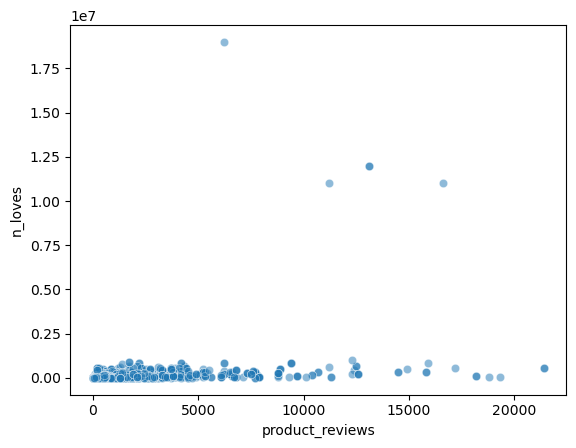

array(['cream lip stain liquid lipstick', 'radiant creamy concealer',
       'lip sleeping mask intense hydration with vitamin c',
       'soft pinch liquid blush'], dtype=object)

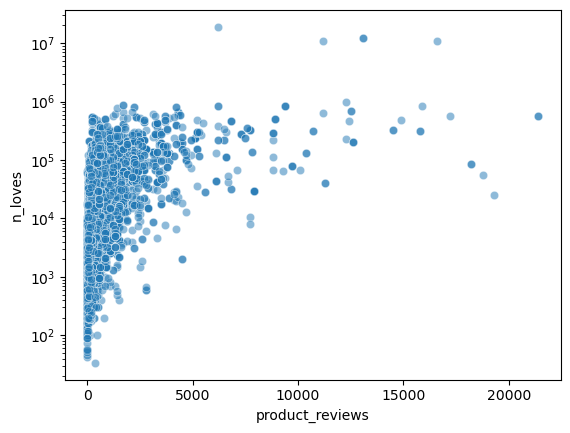

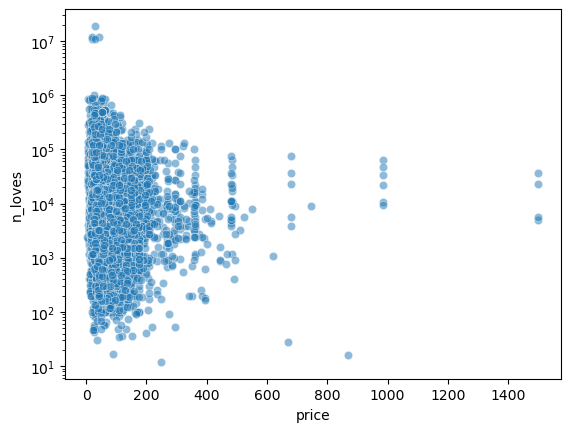

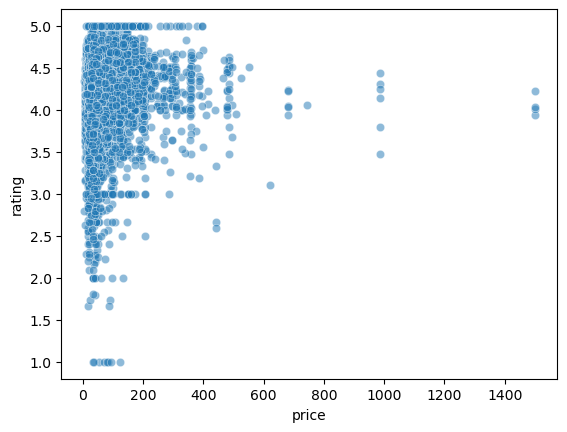

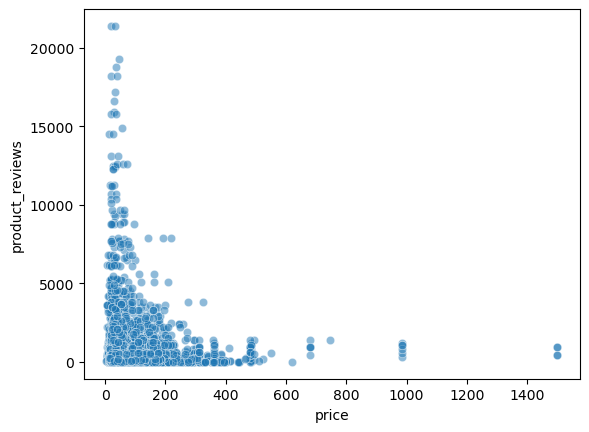

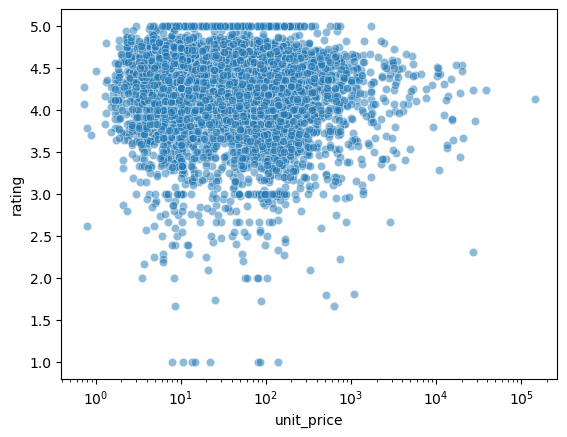

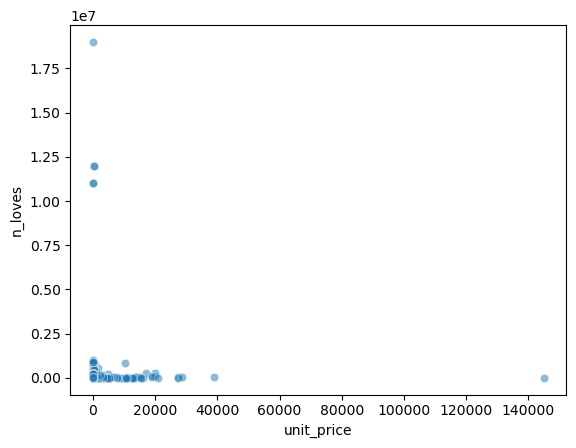

In [148]:

# df_products
# EDA - what is the distribution of product reviews
# scatter reviews v ratings

sns.scatterplot(data=df, x="product_reviews", y="rating", alpha=0.5)
plt.show()
# how many products have no reviews?
# interesting outliers - looked at reviews, truly bad
display(df_products[(df['product_reviews']>4000) & (df_products['rating']<3.2)])


# scattr review v loves
# the handful of outliers are so interesting
# was there a promotion to add these to loves list?
sns.scatterplot(data=df, x="product_reviews", y="n_loves", alpha=0.5)
plt.show()
display(df[(df['n_loves']>1500000)]['product_name'].unique())
sns.scatterplot(data=df, x="product_reviews", y="n_loves", alpha=0.5)
plt.yscale('log')
plt.show()
# scatter n loves v price 
sns.scatterplot(data=df, x="price", y="n_loves", alpha=0.5)
plt.yscale('log')
plt.show()


sns.scatterplot(data=df, x="price", y="rating", alpha=0.5)
plt.show()

sns.scatterplot(data=df, x="price", y="product_reviews", alpha=0.5)
plt.show()

sns.scatterplot(data=df[df['unit_a']=='oz'], x="unit_price", y="rating", alpha=0.5)
plt.xscale('log')
plt.show()

sns.scatterplot(data=df[df['unit_a']=='oz'], x="unit_price", y="n_loves", alpha=0.5)
plt.show()